In [1]:
!pip install azure-storage-blob
!pip install azure-cosmos
!pip install azure-datalake-store
import os, uuid
from azure.storage.blob import BlobServiceClient, BlobClient, ContainerClient, __version__
from azure.cosmos import cosmos_client, exceptions
from azure.cosmos.partition_key import PartitionKey
!az version
!az version --output jsonc
!az version --output table
# S : 2.xx
!az login
!az account show

IndentationError: unexpected indent (2809485206.py, line 11)

In [22]:
import json
from azure.cosmos import CosmosClient
from azure.cosmos.partition_key import PartitionKey

'''
!az cosmosdb create \
  --name projectdatabase \
  --resource-group project-azure \
  --location regionName=francecentral \

'''
cosmosdb_uri = 'https://projectdabase.documents.azure.com:443/'
cosmosdb_primary_key = 'CrqivVmXtfHT3gVCC394h9vJX2U9jjDlMkXGHuHda9hLgku6MJnLTRK3CVV7NmBxTJpxTxtX2rIq8l6pnmqLAg=='
client = CosmosClient(cosmosdb_uri, cosmosdb_primary_key)
print("Connextion success to", type(client))


Connextion success to <class 'azure.cosmos.cosmos_client.CosmosClient'>


In [23]:
db = client.create_database_if_not_exists('imagesDataBase')
print('Database created or used', type(db))

Database created or used <class 'azure.cosmos.database.DatabaseProxy'>


In [24]:
print(client.get_database_client('imagesDataBase'))
properties = db.read()
print(json.dumps(properties))

<DatabaseProxy [dbs/imagesDataBase]>
{"id": "imagesDataBase", "_rid": "if4oAA==", "_self": "dbs/if4oAA==/", "_etag": "\"00007609-0000-0e00-0000-62c2b6cf0000\"", "_colls": "colls/", "_users": "users/", "_ts": 1656927951}


In [25]:
container = db.create_container_if_not_exists(id='WebsiteData', partition_key=PartitionKey(path='/CartID'))
print('Container WebsiteData created', type(container))


Container WebsiteData created <class 'azure.cosmos.container.ContainerProxy'>


In [2]:
#!az cognitiveservices account list-kinds
'''!az cognitiveservices account create \
    --name cog-project-2022 \
    --resource-group project-azure \
    --kind ComputerVision \
    --sku f0 \
    --location westus2 \
    --yes'''

'!az cognitiveservices account create     --name cog-project-2022     --resource-group project-azure     --kind ComputerVision     --sku f0     --location westus2     --yes'

In [6]:
cog_key = '9b9f11767d6b4326bb398fec2eb34fc2'
cog_endpoint = 'https://westus2.api.cognitive.microsoft.com/'

print(f'Ready to use cognitive services at {cog_endpoint} using key {cog_key}')

Ready to use cognitive services at https://westus2.api.cognitive.microsoft.com/ using key 9b9f11767d6b4326bb398fec2eb34fc2


In [7]:
from azure.cognitiveservices.vision.computervision import ComputerVisionClient
from msrest.authentication import CognitiveServicesCredentials
from azure.cognitiveservices.vision.computervision.models import OperationStatusCodes
from azure.cognitiveservices.vision.computervision.models import VisualFeatureTypes

computervision_client = ComputerVisionClient(cog_endpoint, CognitiveServicesCredentials(cog_key))

In [8]:
import os
import sys
import requests
from io import BytesIO

from array import array
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw
import time

In [127]:
from pathlib import Path
import matplotlib as plt
#import Image

local_path = "C:\\Users\\John\\Desktop\\DataSet\\"

## Recuperer les tags
i = 1
list_tag = []
features = ["brands"]
json_file = '['
j = 1

while i<=15 :
    print('------------ Image '+str(i)+' treatment ---------')
    print('Identify Tags : -------------------')
    img = local_path+str(i)+'.jpg'
    image_stream = open(img, "rb")
    #image_brand = Image.open(img)
    tags_result = computervision_client.tag_image_in_stream(image_stream)
    if (len(tags_result.tags) == 0):
        print("No tags detected.")
    else:
        for tag in tags_result.tags:
            list_tag.append(tag.name)
#    list_tag.append(description.tags)
    for tag in tags_result.tags:
        print(tag.name)
        if (i<=15):
            json_file = json_file +"{\"id\":\""+str(j)+"\",\"path\":"+str(i)+",\"tags\":"+str(tag.name)+"}, "
            j += 1
    del tags_result
    print('Identify Brand : ------------------')
    print('Ne marche pas')

    detect_objects_results = computervision_client.analyze_image_in_stream(image_stream, features)
    # Print detection results with bounding box and confidence score
    if len(detect_objects_results.brands) == 0:
        print("No brands detected.")
    else:
        for brand in detect_objects_results.brands:
            print("'{}' brand detected with confidence {:.1f}% at location {}, {}, {}, {}".format( \
            brand.name, brand.confidence * 100, brand.rectangle.x, brand.rectangle.x + brand.rectangle.w, \
            brand.rectangle.y, brand.rectangle.y + brand.rectangle.h))
    plt.imshow(image_brand)
    
    #upload to bob
    blob_client = blob_service_client.get_blob_client(container='contenair-images', blob=img)
    print("\nUploading to Azure Storage as blob:\n\t" + img)
    with open(img, "rb") as data:
        blob_client.upload_blob(data)
    
    i += 1    
print('create JsonFile : ---------------------------')


print(json_file)
f = open("C:\\Users\\John\\Desktop\\DataSet\\file.json", "a")
f.write(json_file)
f.close()

#insert into database
container.create_item("C:\\Users\\John\\Desktop\\DataSet\\file.json")

AttributeError: 'str' object has no attribute 'get'

In [149]:
items = list(container.query_items(
        query="SELECT c.path FROM c WHERE c.tags=@tags",
        parameters=[
            { "name":"@tags", "value": "food" }
        ],
        enable_cross_partition_query=True
    ))

    
print(items)
i=0
while i < len(items):
    print(items[i].get('path'))
    i += 1


[{'path': '1'}, {'path': '2'}, {'path': '3'}, {'path': '4'}, {'path': '5'}, {'path': '6'}, {'path': '7'}, {'path': '8'}, {'path': '9'}, {'path': '10'}, {'path': '11'}, {'path': '12'}, {'path': '13'}, {'path': '14'}]
1
2
3
4
5
6
7
8
9
10
11
12
13
14


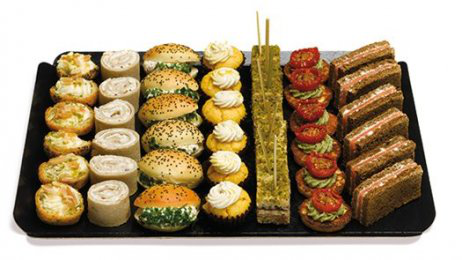

In [136]:
from PIL import Image
import requests
from io import BytesIO

response = requests.get("https://storageprojectesgi22.blob.core.windows.net/contenair-images/C:/Users/John/Desktop/DataSet/10.jpg")
img = Image.open(BytesIO(response.content))
img

In [7]:
#!az group create --name project-azure --location francecentral
!az group show --name project-azure
!az storage account create \
  --name storageprojectesgi22 \
  --resource-group project-azure \
  --location francecentral \
  --sku Standard_LRS \
  --kind StorageV2 \
  --min-tls-version TLS1_2 \
  --access-tier Hot  




{
  "id": "/subscriptions/cd3784ac-9bcb-460d-a5d5-58ee5ece6c51/resourceGroups/project-azure",
  "location": "francecentral",
  "managedBy": null,
  "name": "project-azure",
  "properties": {
    "provisioningState": "Succeeded"
  },
  "tags": null,
  "type": "Microsoft.Resources/resourceGroups"
}
{
  "accessTier": "Hot",
  "allowBlobPublicAccess": true,
  "allowCrossTenantReplication": null,
  "allowSharedKeyAccess": null,
  "allowedCopyScope": null,
  "azureFilesIdentityBasedAuthentication": null,
  "blobRestoreStatus": null,
  "creationTime": "2022-07-03T15:35:17.335304+00:00",
  "customDomain": null,
  "defaultToOAuthAuthentication": null,
  "dnsEndpointType": null,
  "enableHttpsTrafficOnly": true,
  "enableNfsV3": null,
  "encryption": {
    "encryptionIdentity": null,
    "keySource": "Microsoft.Storage",
    "keyVaultProperties": null,
    "requireInfrastructureEncryption": null,
    "services": {
      "blob": {
        "enabled": true,
        "keyType": "Account",
        "la

In [10]:
!az storage account keys list --resource-group project-azure --account-name storageprojectesgi22 --query "[0].value" --output tsv


7nKbWyikD69q5ZNMy80kuRDxoylnlz0coVat0zDDG+kt4inbLhKsXkZxdz5mJPtMkTjYsHv9kAeb+AStzJcHJg==


In [12]:
#!az storage container create --name contenair-images --account-name project-azure --account-key 7nKbWyikD69q5ZNMy80kuRDxoylnlz0coVat0zDDG+kt4inbLhKsXkZxdz5mJPtMkTjYsHv9kAeb+AStzJcHJg==
!az storage container list --account-name storageprojectesgi22 -o table --account-key 7nKbWyikD69q5ZNMy80kuRDxoylnlz0coVat0zDDG+kt4inbLhKsXkZxdz5mJPtMkTjYsHv9kAeb+AStzJcHJg==

Name              Lease Status    Last Modified
----------------  --------------  -------------------------
contenair-images                  2022-07-03T15:41:38+00:00


In [34]:
  !az storage blob upload \
    --account-name storageprojectesgi22 \
    --container-name contenair-images \
    --file C:\Users\John\Desktop\Data\1.png \
    --name pizza_denjal.jpg \
    --account-key 7nKbWyikD69q5ZNMy80kuRDxoylnlz0coVat0zDDG+kt4inbLhKsXkZxdz5mJPtMkTjYsHv9kAeb+AStzJcHJg==


{
  "client_request_id": "98ccee24-faea-11ec-8c6d-4889e7938090",
  "content_md5": "VVnRFRy3wRpbxYCD2jpT0Q==",
  "date": "2022-07-03T16:10:03+00:00",
  "encryption_key_sha256": null,
  "encryption_scope": null,
  "etag": "\"0x8DA5D0E7D2AD5DC\"",
  "lastModified": "2022-07-03T16:10:03+00:00",
  "request_id": "e8fef538-a01e-0022-39f7-8e55c3000000",
  "request_server_encrypted": true,
  "version": "2021-06-08",
  "version_id": null
}



Alive[################################################################]  100.0000%
Finished[#############################################################]  100.0000%


In [36]:
!az storage blob upload \
    --account-name storageprojectesgi22 \
    --container-name contenair-images \
    --file C:\Users\John\Desktop\Data\2.png \
    --name 2.png \
    --account-key 7nKbWyikD69q5ZNMy80kuRDxoylnlz0coVat0zDDG+kt4inbLhKsXkZxdz5mJPtMkTjYsHv9kAeb+AStzJcHJg==
!az storage blob upload \
    --account-name storageprojectesgi22 \
    --container-name contenair-images \
    --file C:\Users\John\Desktop\Data\3.png \
    --name 3.png \
    --account-key 7nKbWyikD69q5ZNMy80kuRDxoylnlz0coVat0zDDG+kt4inbLhKsXkZxdz5mJPtMkTjYsHv9kAeb+AStzJcHJg==
!az storage blob upload \
    --account-name storageprojectesgi22 \
    --container-name contenair-images \
    --file C:\Users\John\Desktop\Data\4.png \
    --name 4.png \
    --account-key 7nKbWyikD69q5ZNMy80kuRDxoylnlz0coVat0zDDG+kt4inbLhKsXkZxdz5mJPtMkTjYsHv9kAeb+AStzJcHJg==
!az storage blob upload \
    --account-name storageprojectesgi22 \
    --container-name contenair-images \
    --file C:\Users\John\Desktop\Data\5.png \
    --name 5.png \
    --account-key 7nKbWyikD69q5ZNMy80kuRDxoylnlz0coVat0zDDG+kt4inbLhKsXkZxdz5mJPtMkTjYsHv9kAeb+AStzJcHJg==
!az storage blob upload \
    --account-name storageprojectesgi22 \
    --container-name contenair-images \
    --file C:\Users\John\Desktop\Data\6.png \
    --name 6.png \
    --account-key 7nKbWyikD69q5ZNMy80kuRDxoylnlz0coVat0zDDG+kt4inbLhKsXkZxdz5mJPtMkTjYsHv9kAeb+AStzJcHJg==
!az storage blob upload \
    --account-name storageprojectesgi22 \
    --container-name contenair-images \
    --file C:\Users\John\Desktop\Data\7.png \
    --name 7.png \
    --account-key 7nKbWyikD69q5ZNMy80kuRDxoylnlz0coVat0zDDG+kt4inbLhKsXkZxdz5mJPtMkTjYsHv9kAeb+AStzJcHJg==


{
  "client_request_id": "e02e3eae-faea-11ec-9420-4889e7938090",
  "content_md5": "bXxSXUZckcyrf14Syu7mkg==",
  "date": "2022-07-03T16:12:03+00:00",
  "encryption_key_sha256": null,
  "encryption_scope": null,
  "etag": "\"0x8DA5D0EC48C9D3C\"",
  "lastModified": "2022-07-03T16:12:03+00:00",
  "request_id": "97104f43-e01e-0033-23f7-8ecf77000000",
  "request_server_encrypted": true,
  "version": "2021-06-08",
  "version_id": null
}



Alive[################################################################]  100.0000%
Finished[#############################################################]  100.0000%


{
  "client_request_id": "e11ce0af-faea-11ec-858f-4889e7938090",
  "content_md5": "z/abEXRfGHY/ZCq0uxgSIw==",
  "date": "2022-07-03T16:12:04+00:00",
  "encryption_key_sha256": null,
  "encryption_scope": null,
  "etag": "\"0x8DA5D0EC576DAB0\"",
  "lastModified": "2022-07-03T16:12:05+00:00",
  "request_id": "7c54dfa7-a01e-000d-6df7-8e5808000000",
  "request_server_encrypted": true,
  "version": "2021-06-08",
  "version_id": null
}



Alive[################################################################]  100.0000%
Finished[#############################################################]  100.0000%


{
  "client_request_id": "e2113c29-faea-11ec-bd56-4889e7938090",
  "content_md5": "nCJ/IbWv6eFmBqwQhcuQug==",
  "date": "2022-07-03T16:12:06+00:00",
  "encryption_key_sha256": null,
  "encryption_scope": null,
  "etag": "\"0x8DA5D0EC66CAF35\"",
  "lastModified": "2022-07-03T16:12:06+00:00",
  "request_id": "4d911e83-701e-000e-2ff7-8eb96c000000",
  "request_server_encrypted": true,
  "version": "2021-06-08",
  "version_id": null
}



Alive[################################################################]  100.0000%
Finished[#############################################################]  100.0000%


{
  "client_request_id": "e306ab0b-faea-11ec-be8e-4889e7938090",
  "content_md5": "giBf5MxNLjKYK7YODthkgg==",
  "date": "2022-07-03T16:12:08+00:00",
  "encryption_key_sha256": null,
  "encryption_scope": null,
  "etag": "\"0x8DA5D0EC7656989\"",
  "lastModified": "2022-07-03T16:12:08+00:00",
  "request_id": "8ad0a8be-b01e-005c-3ef7-8ec584000000",
  "request_server_encrypted": true,
  "version": "2021-06-08",
  "version_id": null
}



Alive[################################################################]  100.0000%
Finished[#############################################################]  100.0000%


{
  "client_request_id": "e4112c5b-faea-11ec-ad70-4889e7938090",
  "content_md5": "ezP6w6QJCSjnsw3OmnnEyg==",
  "date": "2022-07-03T16:12:09+00:00",
  "encryption_key_sha256": null,
  "encryption_scope": null,
  "etag": "\"0x8DA5D0EC86B683B\"",
  "lastModified": "2022-07-03T16:12:09+00:00",
  "request_id": "88d527cd-201e-005e-03f7-8e7b3c000000",
  "request_server_encrypted": true,
  "version": "2021-06-08",
  "version_id": null
}



Alive[################################################################]  100.0000%
Finished[#############################################################]  100.0000%


{
  "client_request_id": "e51b6dda-faea-11ec-968b-4889e7938090",
  "content_md5": "IYG+QR+p0lpx5Lyw5EJ9ww==",
  "date": "2022-07-03T16:12:11+00:00",
  "encryption_key_sha256": null,
  "encryption_scope": null,
  "etag": "\"0x8DA5D0EC9744CC3\"",
  "lastModified": "2022-07-03T16:12:11+00:00",
  "request_id": "b0174755-a01e-0032-25f7-8e90ab000000",
  "request_server_encrypted": true,
  "version": "2021-06-08",
  "version_id": null
}



Alive[################################################################]  100.0000%
Finished[#############################################################]  100.0000%


In [69]:
blob_service_client = BlobServiceClient.from_connection_string("DefaultEndpointsProtocol=https;AccountName=storageprojectesgi22;AccountKey=7nKbWyikD69q5ZNMy80kuRDxoylnlz0coVat0zDDG+kt4inbLhKsXkZxdz5mJPtMkTjYsHv9kAeb+AStzJcHJg==;EndpointSuffix=core.windows.net")


In [73]:
from pathlib import Path

local_path = "C:\\Users\\John\\Desktop\\data\\"

i = 1
while i<=7 :
    img = local_path+str(i)+'.png'
    blob_client = blob_service_client.get_blob_client(container='contenair-images', blob=img)
    print("\nUploading to Azure Storage as blob:\n\t" + img)
    with open(img, "rb") as data:
        blob_client.upload_blob(data)
    i += 1



Uploading to Azure Storage as blob:
	C:\Users\John\Desktop\data\1.png

Uploading to Azure Storage as blob:
	C:\Users\John\Desktop\data\2.png

Uploading to Azure Storage as blob:
	C:\Users\John\Desktop\data\3.png

Uploading to Azure Storage as blob:
	C:\Users\John\Desktop\data\4.png

Uploading to Azure Storage as blob:
	C:\Users\John\Desktop\data\5.png

Uploading to Azure Storage as blob:
	C:\Users\John\Desktop\data\6.png

Uploading to Azure Storage as blob:
	C:\Users\John\Desktop\data\7.png


In [76]:
# liste des objets blob d’un conteneur
print("\nListing blobs...")
container_client = blob_service_client.get_container_client("contenair-images")
# List the blobs in the container
blob_list = container_client.list_blobs()
for blob in blob_list:
    print("\t" + blob.name)


Listing blobs...
	C:/Users/John/Desktop/data/1.png
	C:/Users/John/Desktop/data/2.png
	C:/Users/John/Desktop/data/3.png
	C:/Users/John/Desktop/data/4.png
	C:/Users/John/Desktop/data/5.png
	C:/Users/John/Desktop/data/6.png
	C:/Users/John/Desktop/data/7.png
